# <center><b> GROUP 17 </b></center>
## <center><b> House Price Pridiction</b></center>
#### Author: Visharad Ravi, Shivanshu Singh, Uday Kurella

In [1]:
import pandas as pd
import numpy as np

from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

C:\Users\vrvis\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Analysing Price which is our main variable.

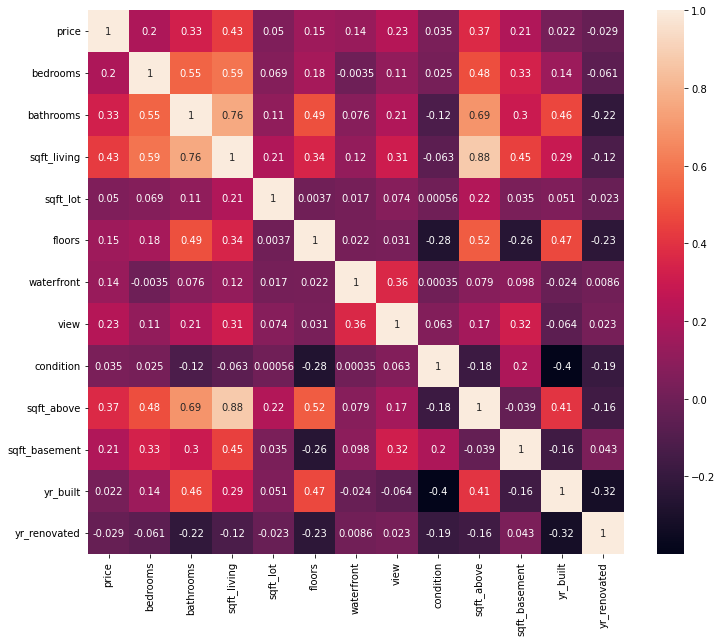

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

From the plot we can deduce that these's is some collinearity between 2 variables: i.e. <b>sqft_living and sqft_above</b>. Since they have correlation ratio more than 0.2 lets restrict the matrix.

<AxesSubplot:>

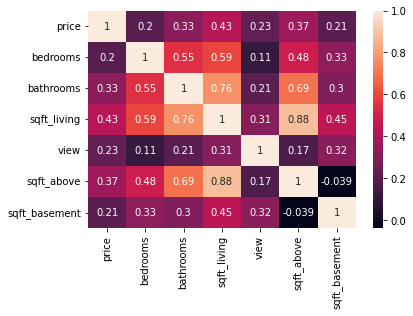

In [9]:
cor_matrix = data.corr()
top_cor_feature = cor_matrix.index[abs(cor_matrix['price'])>0.2]
plt.figure()
sns.heatmap(data[top_cor_feature].corr(), annot=True)

lets further restric the matrix.

<AxesSubplot:>

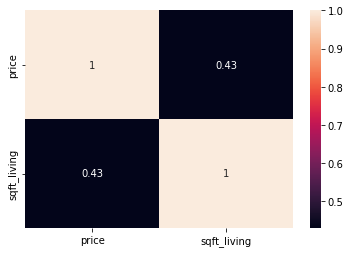

In [10]:
cor_matrix = data.corr()
top_cor_feature = cor_matrix.index[abs(cor_matrix['price'])>0.4]
plt.figure()
sns.heatmap(data[top_cor_feature].corr(), annot=True)

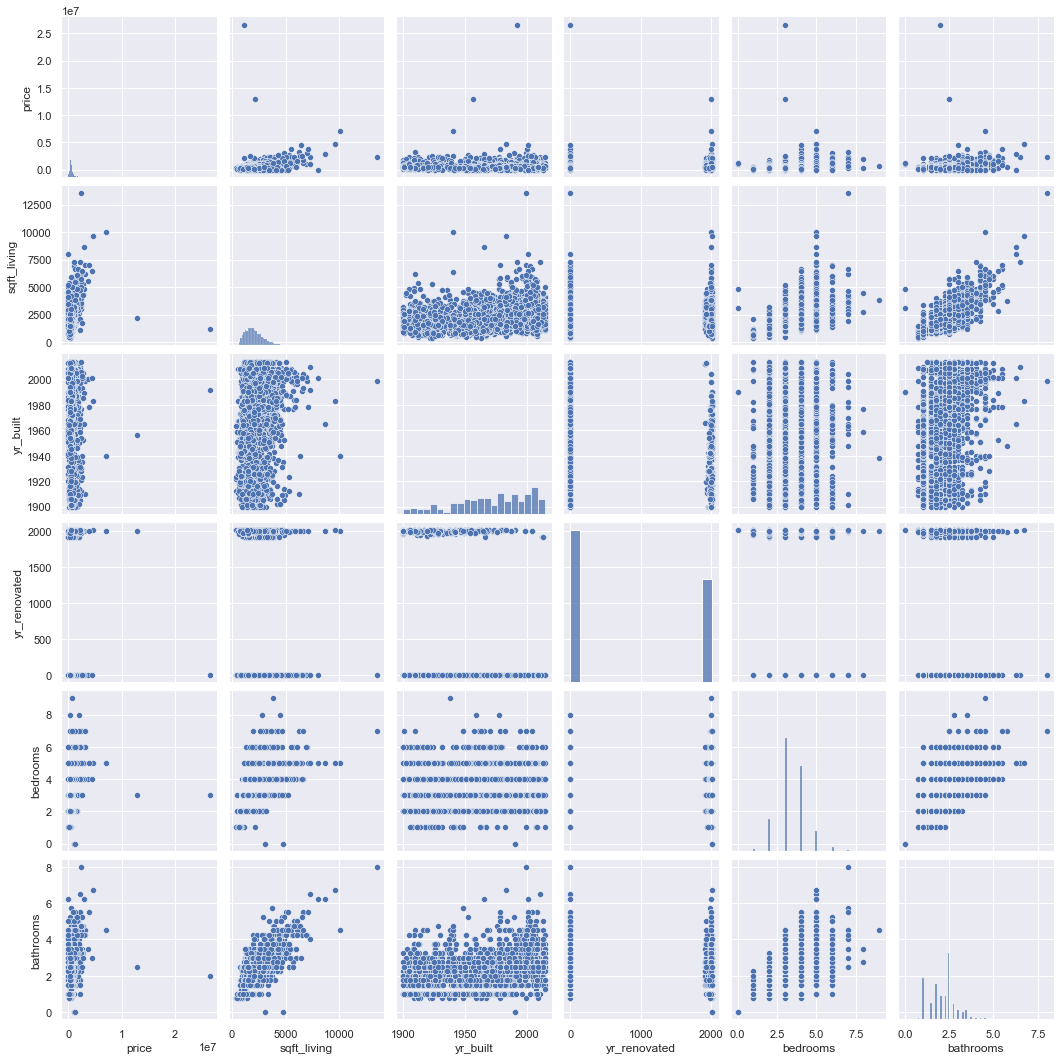

In [11]:
sns.set()
col = ['price', 'sqft_living', 'yr_built', 'yr_renovated', 'bedrooms', 'bathrooms']
sns.pairplot(data[col])
plt.show()

In [12]:
# dropping unwanted columns 
data.drop(data.columns[[0, 14,16,17]], axis=1, inplace=True)

In [13]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 503.2+ KB


In [15]:
# One Hot Encoding
data.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [16]:
data['city']=data['city'].apply({'Shoreline':0,'Seattle':1,'Kent':2,'Bellevue':3,'Redmond':4,'Maple Valley':5,'North Bend':6,'Lake Forest Park':7,
                                 'Sammamish':8,'Auburn':9,'Des Moines':10,'Bothell':11,'Federal Way':12,'Kirkland':13,'Issaquah':14,
                                 'Woodinville':15,'Normandy Park':16,'Fall City':17,'Renton':18,'Carnation':19,'Snoqualmie':20,
                                 'Duvall':21,'Burien':22,'Covington':23,'Inglewood-Finn Hill':24,'Kenmore':25,'Newcastle':26,'Mercer Island':27,
                                 'Black Diamond':28,'Ravensdale':29,'Clyde Hill':30,'Algona':31,'Skykomish':32,'Tukwila':33,'Vashon':34,
                                 'Yarrow Point':35,'SeaTac':36,'Medina':37,'Enumclaw':38,'Snoqualmie Pass':39,'Pacific':40,'Beaux Arts Village':41,
                                'Preston':42,'Milton':43}.get)

In [17]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4


In [18]:
# checking for null values
data.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
# Filtering Outliers
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
data = data[~((data<(q1 - 1.5 * iqr))| (data > (q3 + 1.5 * iqr))).any(axis=1)]

In [20]:
# splitting the dataset into dependent and independent columns.
x = data.drop('price', axis=1)
y = data['price']

In [21]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4
5,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,1


In [22]:
y.head()

0    313000.0
2    342000.0
3    420000.0
4    550000.0
5    490000.0
Name: price, dtype: float64

In [23]:
# Splitting the dataset into training and testing sets. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=40)

### Linear Regressiong

In [24]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
lr_pred = lr.predict(x_test)
lr_pred

array([312048.66992442, 264003.24937421, 445563.2638732 , 324249.10788468,
       559318.86426344, 260306.54760484, 637358.38424228, 731081.73853093,
       300586.46694249, 443383.54929898, 529099.06151578, 451780.78026089,
       588088.9580602 , 429601.35111225, 402457.53570909, 332664.58674354,
       333845.26775553, 462174.08008262, 545823.03517804, 454997.95922396,
       636374.63509854, 368122.23412646, 622337.66809797, 355565.84562056,
       318192.54557043, 482533.30891641, 490312.70456836, 341082.61500773,
       348284.4147414 , 558579.76091613, 285155.07841111, 259998.34126028,
       291117.28373913, 420174.4961655 , 363417.59534931, 415527.17472582,
       302312.59459287, 605907.47169958, 469811.91247469, 639239.75915787,
       488757.03260167, 453375.59319113, 547321.38931774, 756751.88870686,
       631034.09977019, 260526.69945652, 446388.91004628, 420167.26355362,
       387546.60597155, 475168.73793521, 196596.46754849, 152379.97190621,
       347024.14333402, 4

In [26]:
lr.score(x,y)

0.43714954611069734

In [27]:
print('MAE:', mean_absolute_error(y_test, lr_pred))
print('MSE:', mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))

MAE: 112531.24906249391
MSE: 21529119290.48216
RMSE: 146728.04534403828


### Random Forest

In [28]:
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [29]:
random_prediction = regressor.predict(x_test)
random_prediction

array([457595.79555556, 348019.86555552, 425748.66666667, 281628.06083334,
       472773.        , 202015.62111111, 855877.46333333, 762450.588046  ,
       194884.76666667, 284574.98174601, 524608.18333333, 425692.01      ,
       858944.81444444, 350014.65666667, 528174.55833333, 385901.79846561,
       435655.60285715, 514495.63063491, 512018.18833333, 509737.75078348,
       654411.23166667, 489242.09407407, 560037.56794872, 268418.5       ,
       305547.54444448, 526855.97222215, 550450.18666667, 408220.72666667,
       230277.70587302, 647411.93166667, 169152.41627778, 283672.52388889,
       219116.04743589, 384374.55589744, 299346.32587302, 426147.58796296,
       275734.30208992, 587778.28928571, 367689.08888889, 722432.14333333,
       397372.475     , 411412.91666667, 548781.77153847, 647650.31944444,
       757038.0111111 , 221222.96104841, 406486.68857143, 352426.61714286,
       392062.95153439, 313091.37571429, 197949.81459827, 275272.13717948,
       239033.50269841, 3

In [30]:
regressor.score(x,y)

0.8910318063520745

In [31]:
print('MAE:', mean_absolute_error(y_test, random_prediction))
print('MSE:', mean_squared_error(y_test, random_prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, random_prediction)))

MAE: 80970.53329218418
MSE: 13752804373.197418
RMSE: 117272.35127342428


## XGBoost

In [32]:
xgbr = XGBRegressor(n_estimators=5000, learning_rate=0.05, max_depth=4, random_state=5)
xgbr.fit(x_train, y_train)

C:\Users\vrvis\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=5, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
xgbr_pred = xgbr.predict(x_test)
xgbr_pred

array([ 496932.12,  333643.8 ,  489272.88,  287675.03,  456537.  ,
        194296.66, 1017643.9 ,  681797.9 ,  170563.25,  252860.4 ,
        501954.3 ,  349583.97,  868909.1 ,  343326.28,  458662.88,
        420802.97,  385160.03,  501827.5 ,  486464.12,  482236.94,
        671529.94,  529372.3 ,  498922.66,  242171.03,  335107.28,
        508516.62,  574217.75,  418376.22,  141579.77,  643208.94,
        254569.86,  157671.77,  321815.2 ,  377974.28,  466017.2 ,
        383734.75,  149780.19,  791593.7 ,  323162.62,  668821.9 ,
        404123.56,  475409.53,  631919.4 ,  713139.7 ,  780066.06,
        243631.23,  414019.56,  341056.  ,  416034.25,  366289.53,
        143047.28,  141512.31,  172118.42,  413059.56,  818431.3 ,
        215896.92,  229583.84,  315826.66,  673263.4 ,  234778.3 ,
        446381.28,  512300.75,  548814.3 ,  405574.94,  442612.03,
        347175.2 ,  841044.7 ,  763898.1 ,  557451.94,  529822.94,
        523011.53,  383690.2 ,  259543.6 ,  417988.5 ,  465279

In [34]:
xgbr.score(x,y)

0.9174690322254982

In [35]:
print('MAE:', mean_absolute_error(y_test, xgbr_pred))
print('MSE:', mean_squared_error(y_test, xgbr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, xgbr_pred)))

MAE: 86701.53270001253
MSE: 15325079752.977169
RMSE: 123794.50615022126


## Comparing Models

In [36]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mae_scores = [mean_absolute_error(y_test, lr_pred), mean_absolute_error(y_test, random_prediction), mean_absolute_error(y_test, xgbr_pred)]
mse_scores = [mean_squared_error(y_test, lr_pred), mean_squared_error(y_test, random_prediction), mean_squared_error(y_test, xgbr_pred)]
rmse_scores = [np.sqrt(mean_squared_error(y_test, lr_pred)), np.sqrt(mean_squared_error(y_test, random_prediction)), np.sqrt(mean_squared_error(y_test, xgbr_pred))]
r_scores = [lr.score(x,y), regressor.score(x,y), xgbr.score(x,y)]
comparison_df = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R-squared Score' : r_scores
})

C:\Users\vrvis\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [37]:
print(comparison_df)

               Model            MAE           MSE           RMSE  \
0  Linear Regression  112531.249062  2.152912e+10  146728.045344   
1      Random Forest   80970.533292  1.375280e+10  117272.351273   
2            XGBoost   86701.532700  1.532508e+10  123794.506150   

   R-squared Score  
0         0.437150  
1         0.891032  
2         0.917469  


From the comparison:

<b>Mean Absolute Error (MAE)</b>: Lower values are better. Random Forest has the lowest MAE, followed closely by XGBoost.

<b>Mean Squared Error (MSE)</b>: Lower values are better. Random Forest has the lowest MSE.

<b>Root Mean Squared Error (RMSE)</b>: Lower values are better. Random Forest has the lowest RMSE.

<b>R-squared Score</b>: Higher values are better. XGBoost has the highest R-squared score, indicating better explanatory power.

Considering both the regression evaluation metrics and the R-squared scores, the overall best performing model appears to be <b>XGBoost</b>, as it has competitive values for MAE, MSE, and RMSE, along with the highest R-squared score. It's important to note that the choice of the "best" model may depend on the specific goals and requirements of your application.